5811
/home/chenka@staff.technion.ac.il/Desktop/SVD/female/Functional Hoarseness/Psychogene Dysphonie/1964-a_l.wav
Functional Hoarseness


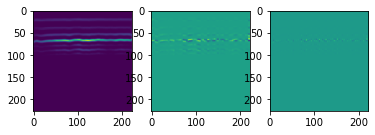

In [15]:
import matplotlib.pyplot as plt
import torch

from architecture.classifier.classification import Classifier
from torch.utils.data import DataLoader
from datasets.SVDDataset import SVDDataset
from core.params import IndexToPathology

import torch.nn as nn
from transformations.transform import ToTensor,CutAndResize,Truncate,PadWhiteNoise,FinalTrans,AddDerivatives
from torchaudio.transforms import Spectrogram,Resample,MelSpectrogram
from torchvision.transforms import Normalize,Resize


data_trans = nn.Sequential(ToTensor(),Truncate(50000),Resample(orig_freq=50000,new_freq=15000),MelSpectrogram(sample_rate=15000,n_fft=500)
        ,Resize((226,224)),AddDerivatives(),Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]))

ds = SVDDataset('/home/chenka@staff.technion.ac.il/Desktop/SVD',data_trans=data_trans)

print(len(ds))

dl = DataLoader(ds,batch_size=1,shuffle=True)

sample = next(iter(dl))

data = sample['data'].squeeze(0)
classification = sample['classification']


print(IndexToPathology[classification.item()])
plt.subplot(1,3,1)
plt.imshow(data[0])
plt.subplot(1,3,2)
plt.imshow(data[1])
plt.subplot(1,3,3)
plt.imshow(data[2])
plt.show()
